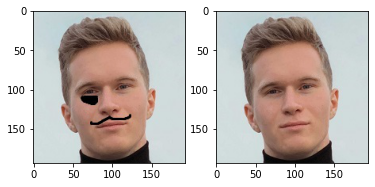

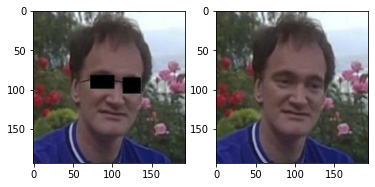

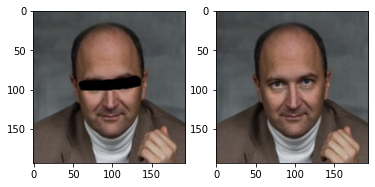

In [2]:
import numpy as np
from scipy.spatial.distance import cdist
from PIL import Image
import os
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


def ham(x): # функция хэвисайд
    for i in range(x.shape[0]):
        if x[i] >= 0:
            continue
        else:
            x[i] = 0
    return x


class Haming:
    def __init__(self, E):
        self.E = E.T
        self.Q = self.generate_q(E)

    def generate_q(self, E): # генеруем матрицу Q сети MaxNet
        n = E.shape[1]
        Q = np.zeros((E.shape[0], E.shape[0]))
        for i in range(E.shape[0]):
            for j in range(E.shape[0]):
                if i == j:
                    Q[i, j] = 1
                else:
                    Q[i, j] = -1 / n
        return Q

    def one_predict(self, X): # функция для подсчета предсказания для одного входного вектора
        n = E.T.shape[0]
        a = n / 2 + 1 / 2 * np.array([e.dot(X.T) for e in self.E.T])
        y, y_new = a, a
        while True:
            y = y_new
            s = self.Q.dot(y)
            y_new = ham(s)
            if np.array_equal(y, y_new):
                break
        y = np.array(y_new)
        res = np.argmax(y)
        return res

    def train(self, X): # считаем результат для каждого входного вектора
        res_list = []
        if X.shape[0] > 1:
            for x in X:
                res = self.one_predict(x)
                res_list.append(res)
        else:
            res_list = self.one_predict(X)
        return res_list


def create_data(test_dir, train_dir):
  train_arr = []
  train_path = []
  for i in os.listdir(train_dir):
    if re.match(r'[0-9a-zA-Z-]*.jp[e]*g',i):
      train_path.append(train_dir + '/' + i)
      img_train = Image.open(train_dir + '/' + i).convert('RGBA')
      image_file_train = img_train.convert('1')
      image_file_train = image_file_train.resize((100,100))
      arr_train = np.array(image_file_train)
      arr_train = np.array([1 if i else -1 for i in arr_train.ravel()])
      train_arr.append(arr_train)
  test_arr = []
  test_path = []
  for i in os.listdir(test_dir):
    if re.match(r'[0-9a-zA-Z-]*.jp[e]*g',i):
      test_path.append(test_dir + '/' + i)
      img_test = Image.open(test_dir + '/' + i).convert('RGBA')
      image_file_test = img_test.convert('1')
      image_file_test = image_file_test.resize((100,100))
      arr_test = np.array(image_file_test)
      arr_test = np.array([1 if i else -1 for i in arr_test.ravel()])
      test_arr.append(arr_test)
  return np.array(train_arr), np.array(test_arr), train_path, test_path


if __name__=="__main__":
    train_arr, test_arr, train_path, test_path = create_data('/content/test', '/content/train')
    for i, test in enumerate(test_arr):
      E = np.array(train_arr)
      x = np.array(test).reshape((1, test.shape[0]))
      h=Haming(E)
      pre=h.train(x)
      fig, (ax1, ax2) = plt.subplots(1, 2)
      image_train = mpimg.imread(train_path[pre])
      image_test = mpimg.imread(test_path[i])
      ax1.imshow(image_test)
      ax2.imshow(image_train)
      plt.show()
